In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR

from sklearn.ensemble import IsolationForest

from sklearn.model_selection import cross_val_score, validation_curve, learning_curve
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
print("dataset size",train.shape)

dataset size (1460, 81)


In [5]:
for k,v in dict(train.isnull().sum()).items():
    print("{} : {:0.2f} ".format(k,float(v/1460)*100))
    pass
pass

Id : 0.00 
MSSubClass : 0.00 
MSZoning : 0.00 
LotFrontage : 17.74 
LotArea : 0.00 
Street : 0.00 
Alley : 93.77 
LotShape : 0.00 
LandContour : 0.00 
Utilities : 0.00 
LotConfig : 0.00 
LandSlope : 0.00 
Neighborhood : 0.00 
Condition1 : 0.00 
Condition2 : 0.00 
BldgType : 0.00 
HouseStyle : 0.00 
OverallQual : 0.00 
OverallCond : 0.00 
YearBuilt : 0.00 
YearRemodAdd : 0.00 
RoofStyle : 0.00 
RoofMatl : 0.00 
Exterior1st : 0.00 
Exterior2nd : 0.00 
MasVnrType : 0.55 
MasVnrArea : 0.55 
ExterQual : 0.00 
ExterCond : 0.00 
Foundation : 0.00 
BsmtQual : 2.53 
BsmtCond : 2.53 
BsmtExposure : 2.60 
BsmtFinType1 : 2.53 
BsmtFinSF1 : 0.00 
BsmtFinType2 : 2.60 
BsmtFinSF2 : 0.00 
BsmtUnfSF : 0.00 
TotalBsmtSF : 0.00 
Heating : 0.00 
HeatingQC : 0.00 
CentralAir : 0.00 
Electrical : 0.07 
1stFlrSF : 0.00 
2ndFlrSF : 0.00 
LowQualFinSF : 0.00 
GrLivArea : 0.00 
BsmtFullBath : 0.00 
BsmtHalfBath : 0.00 
FullBath : 0.00 
HalfBath : 0.00 
BedroomAbvGr : 0.00 
KitchenAbvGr : 0.00 
KitchenQual : 0.0

# Data wrangling

In [6]:
#we are going to drop columns with many missing values
train = train.drop('Alley', axis = 1).drop('FireplaceQu', axis = 1).drop('MiscFeature', axis = 1).drop('Fence', axis = 1).drop('PoolQC', axis = 1)

In [7]:
train.set_index('Id', inplace=True)

In [8]:
for elm in train:
    if train[elm].dtype == 'object':
        if train[elm].isnull().sum() != 0:
            train[elm] = train[elm].fillna(train[elm].mode())
    else:
        if train[elm].isnull().sum() != 0:
            x = train[elm].median()
            train[elm] = train[elm].fillna(int(x))
            pass
        pass
    pass
pass

In [9]:
nan_values = list()

for k,v in dict(train.isnull().sum()).items():
    if(v!=0):
        print(k, train[k].unique())
        nan_values.append(str(k))
        print("-"*20)
        pass
    pass
pass

for elm in train[nan_values]:
    train[elm] = train[elm].astype("str")
    train[str(elm)] = train[str(elm)].replace("nan", train['BsmtQual'].mode()[0])
    pass
pass


MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
--------------------
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
--------------------
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
--------------------
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
--------------------
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
--------------------
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
--------------------
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
--------------------
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
--------------------
GarageFinish ['RFn' 'Unf' 'Fin' nan]
--------------------
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
--------------------
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
--------------------


# Data Analysis and visualization

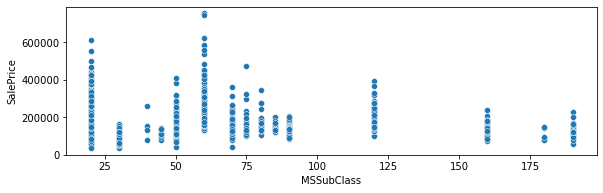

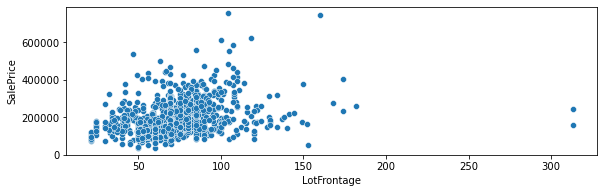

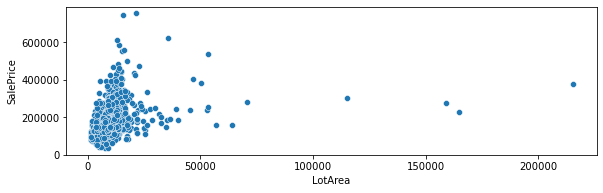

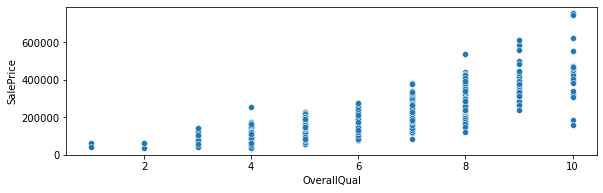

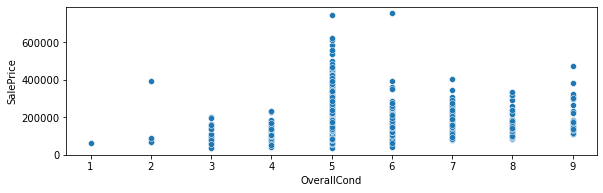

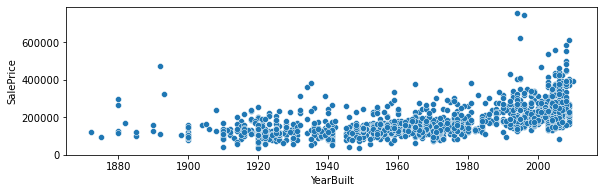

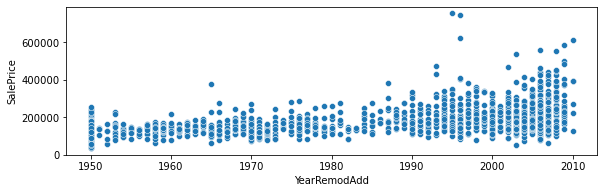

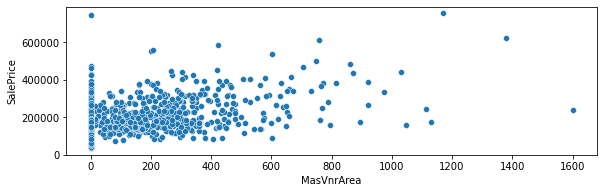

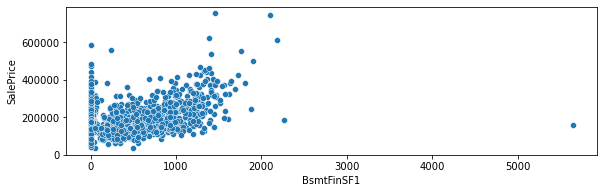

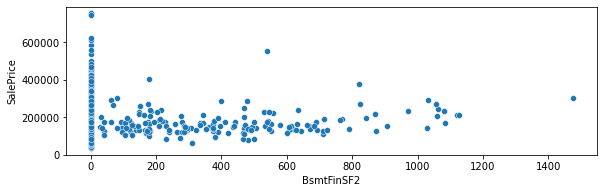

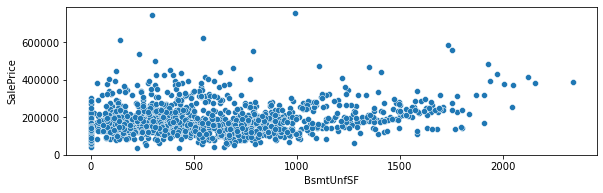

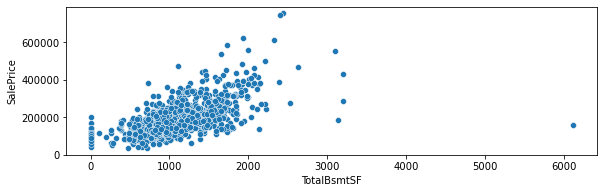

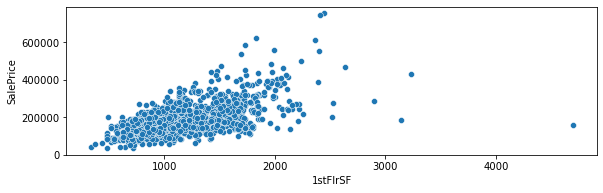

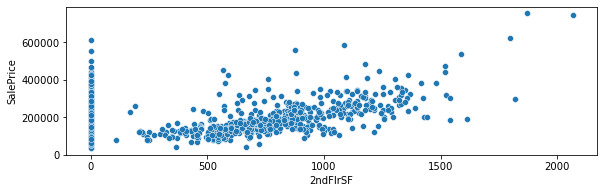

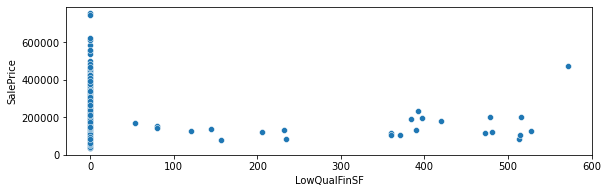

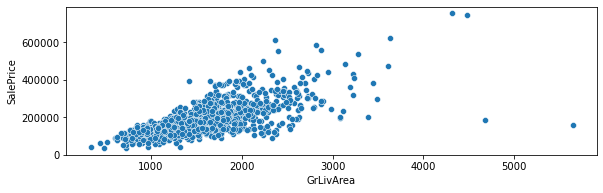

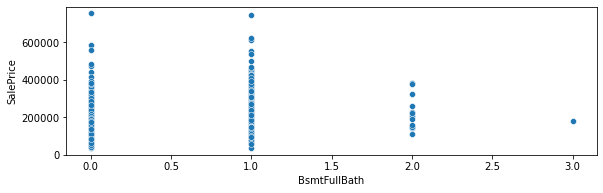

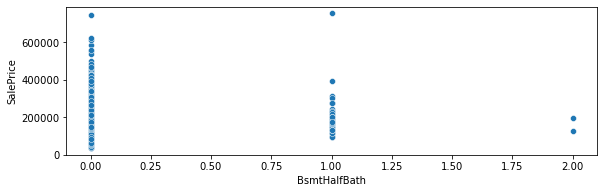

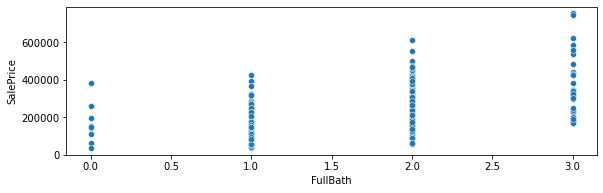

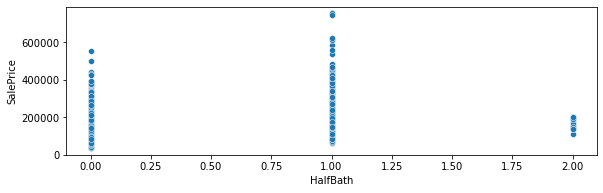

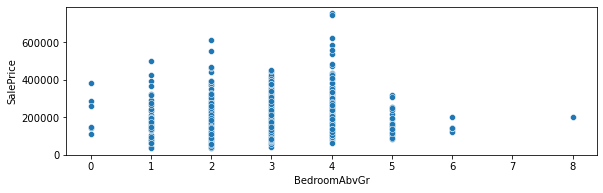

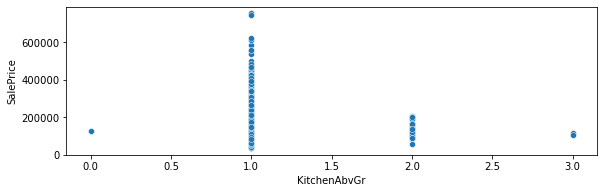

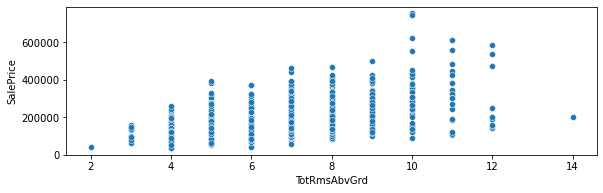

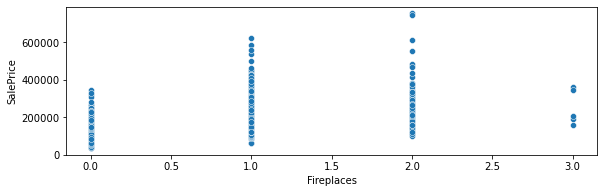

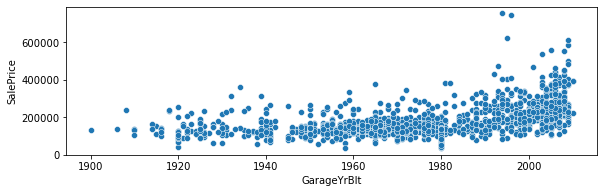

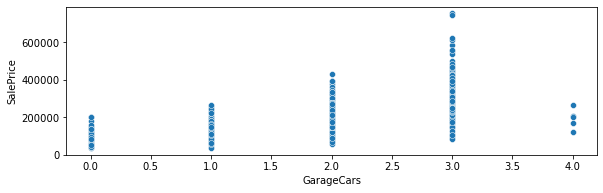

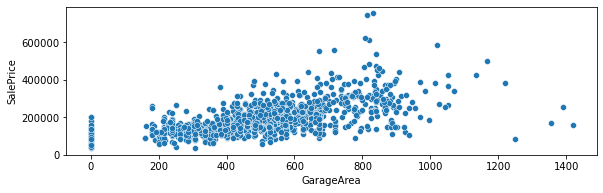

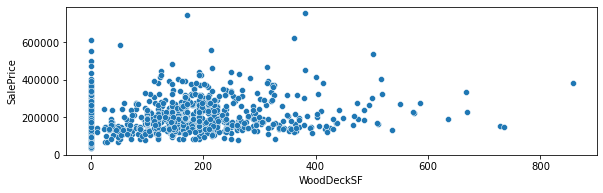

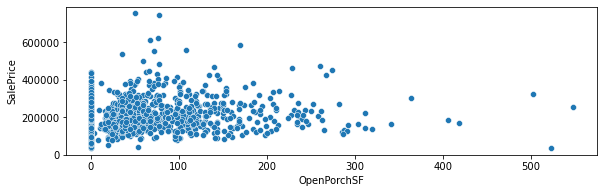

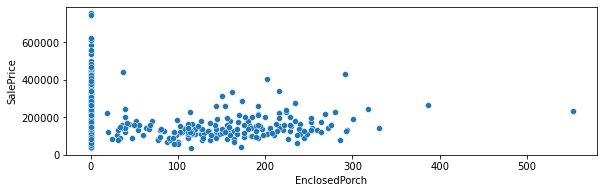

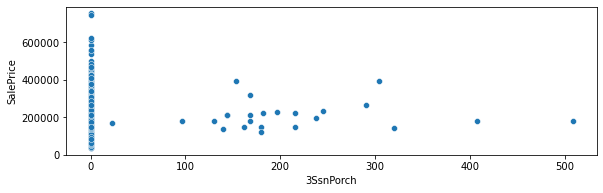

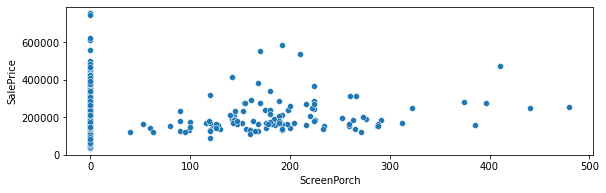

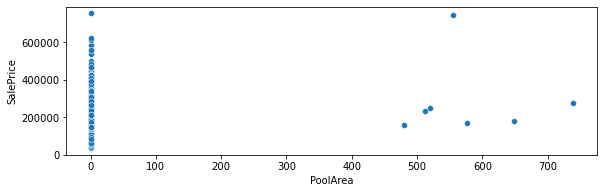

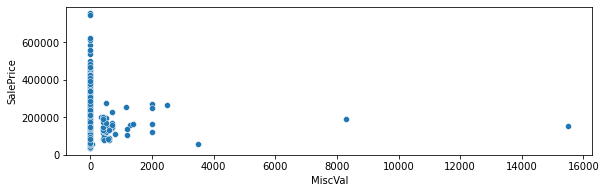

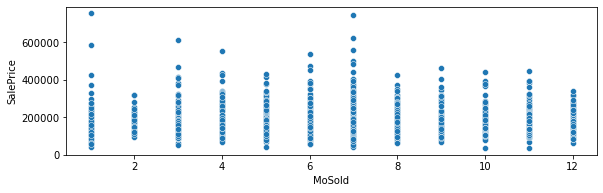

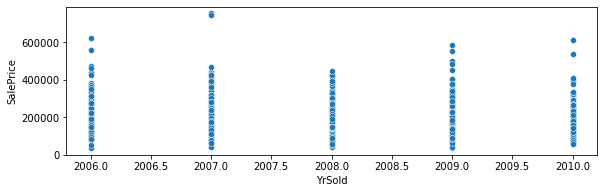

In [10]:
for elm in train:
    if train[elm].dtype != 'object' and elm != 'SalePrice':
        fig = plt.figure(figsize=(16,5))
        fig.add_subplot(2,2,1)
        sns.scatterplot(train[elm], train['SalePrice'])
        plt.tight_layout()
    pass
pass

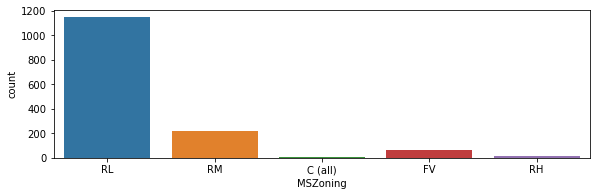

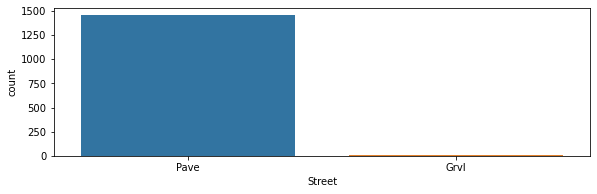

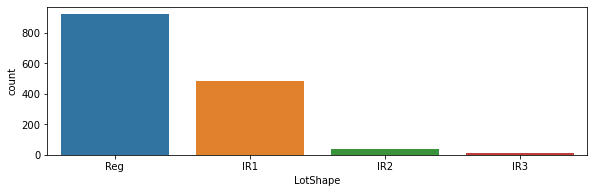

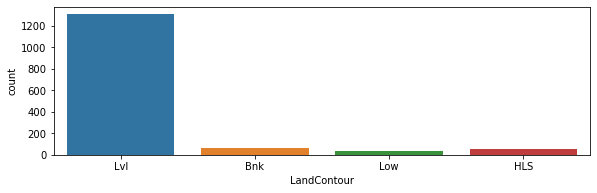

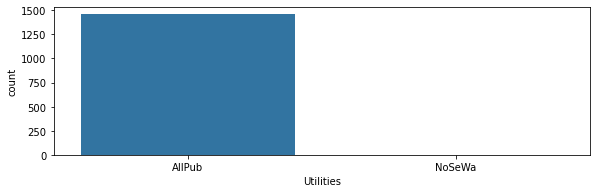

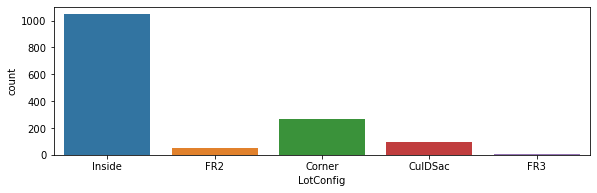

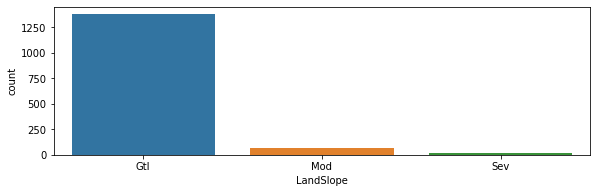

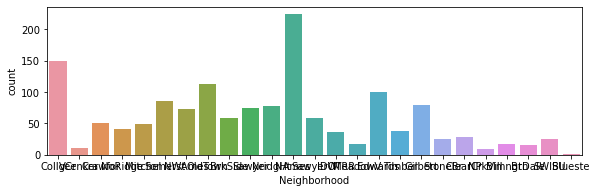

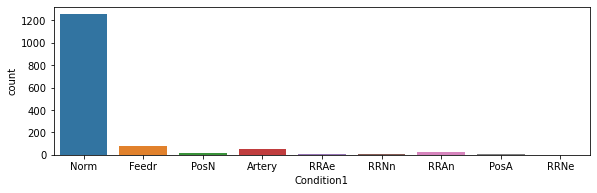

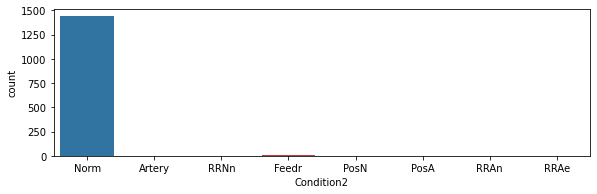

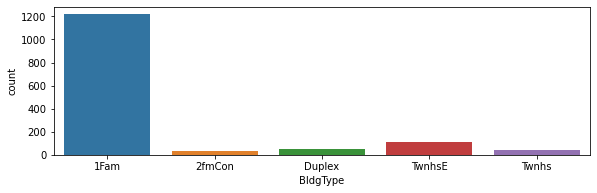

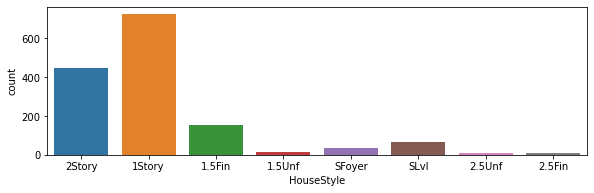

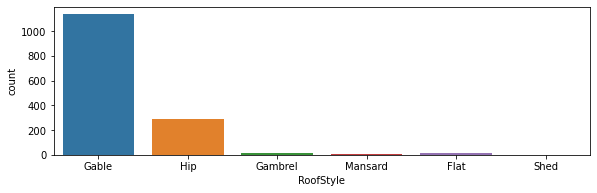

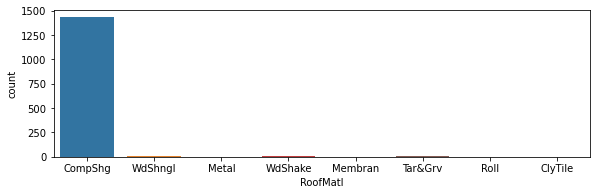

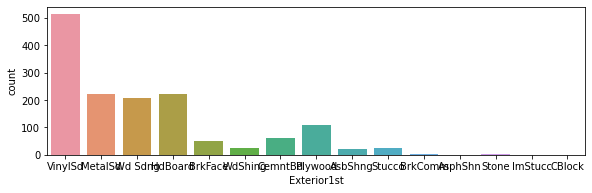

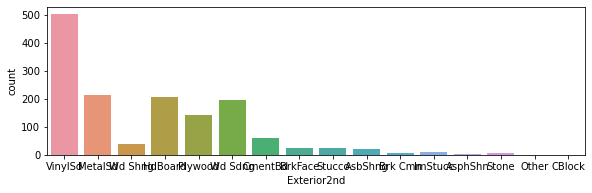

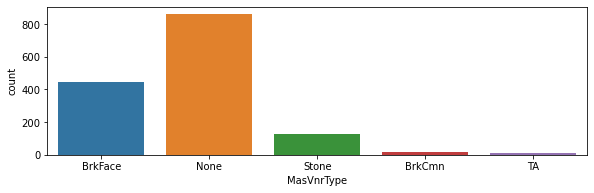

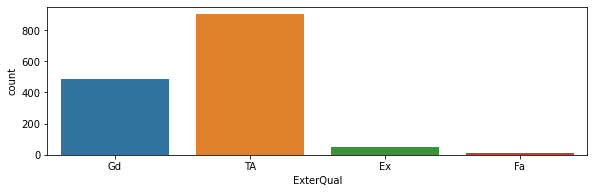

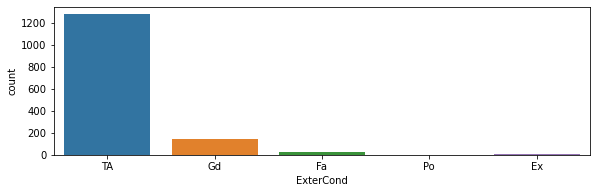

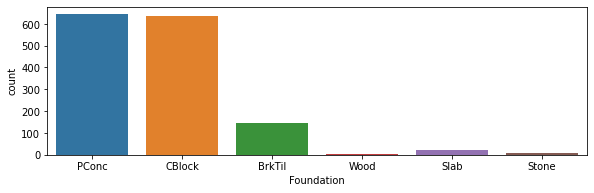

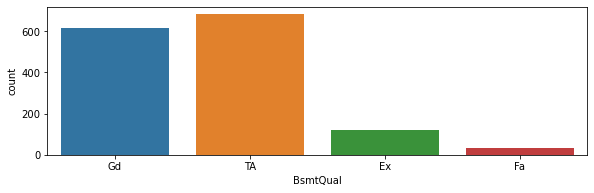

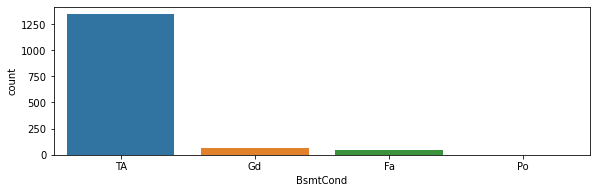

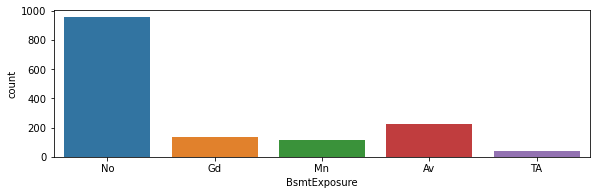

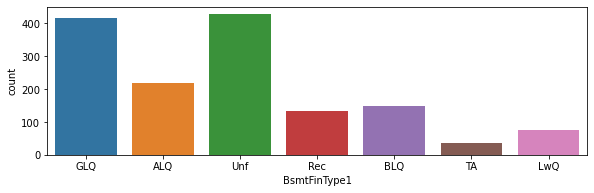

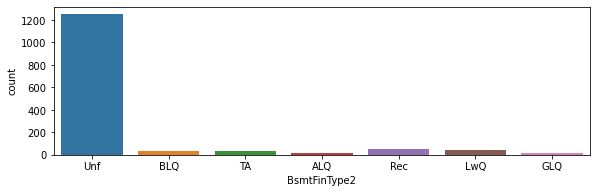

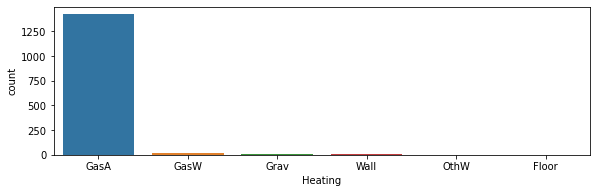

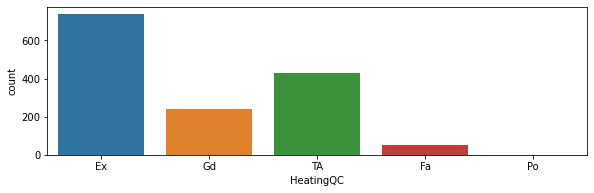

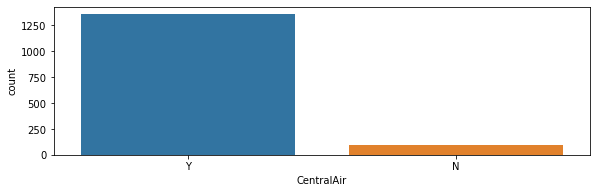

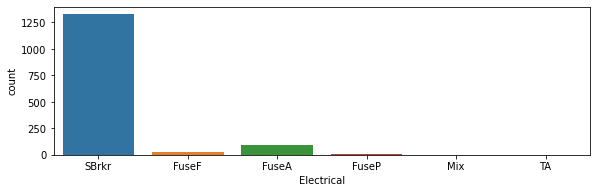

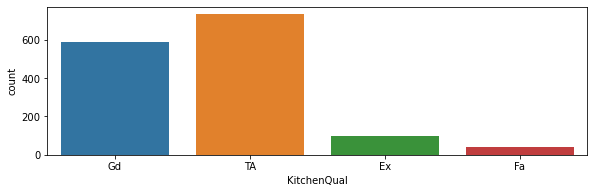

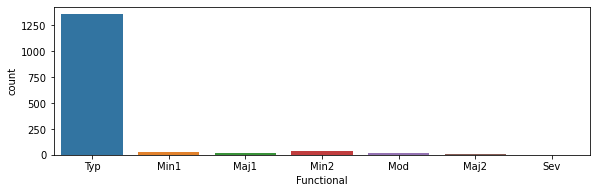

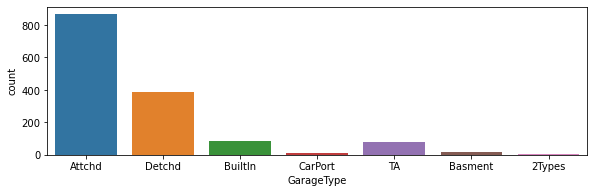

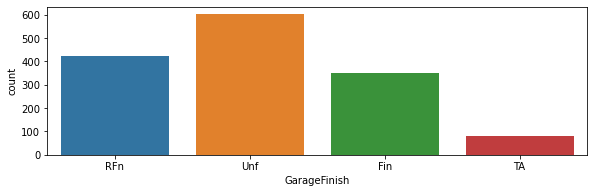

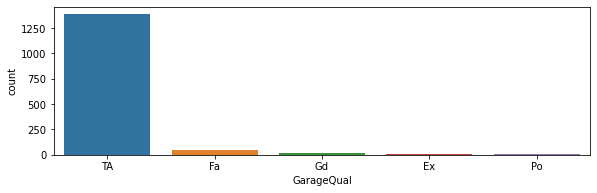

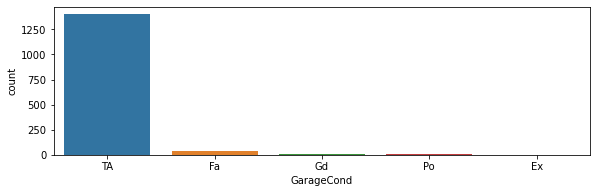

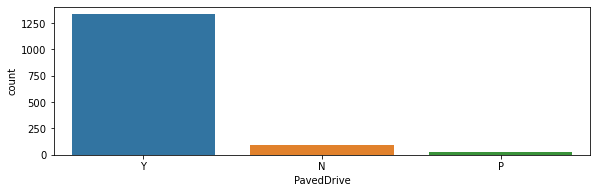

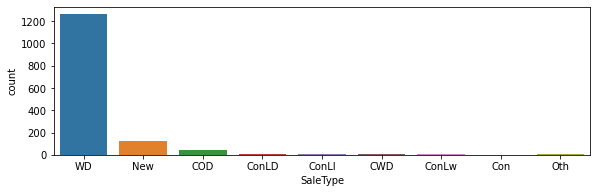

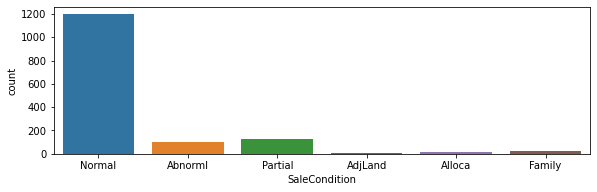

In [11]:
for elm in train:
    if train[elm].dtype == 'object':
        fig = plt.figure(figsize=(16,5))
        fig.add_subplot(2,2,1)
        sns.countplot(train[elm])
        plt.tight_layout()
    pass
pass

# Transforming the data

In [12]:
categorical_features = ['']
for elm in train:
    if train[elm].dtype == 'object':
        try:
            obj = LabelEncoder()
            train[elm] = obj.fit_transform(train[elm])
        except:
            train = train.drop(elm, axis = 1)
            print("Exception in ",elm)
        pass
    pass
pass    

# Descriptive Statistics

In [13]:
stat = train.describe().transpose()
stat['coef de variation'] = stat['std']/stat['mean']

In [14]:
stat.sort_values(by = 'coef de variation', ascending=True)

count         mean         std     min     25%     50%     75%  \
YrSold        1460.0  2007.815753    1.328095  2006.0  2007.0  2008.0  2009.0   
YearRemodAdd  1460.0  1984.865753   20.645407  1950.0  1967.0  1994.0  2004.0   
GarageYrBlt   1460.0  1978.589041   23.997022  1900.0  1962.0  1980.0  2001.0   
YearBuilt     1460.0  1971.267808   30.202904  1872.0  1954.0  1973.0  2000.0   
Street        1460.0     0.995890    0.063996     0.0     1.0     1.0     1.0   
...              ...          ...         ...     ...     ...     ...     ...   
LowQualFinSF  1460.0     5.844521   48.623081     0.0     0.0     0.0     0.0   
3SsnPorch     1460.0     3.409589   29.317331     0.0     0.0     0.0     0.0   
MiscVal       1460.0    43.489041  496.123024     0.0     0.0     0.0     0.0   
PoolArea      1460.0     2.758904   40.177307     0.0     0.0     0.0     0.0   
Utilities     1460.0     0.000685    0.026171     0.0     0.0     0.0     0.0   

                  max  coef de variation  
YrSold         2010.0           0.000661  
YearRemodAdd   2010.0           0.010401  
GarageYrBlt    2010.0           0.012128  
YearBuilt      2010.0           0.015322  
Street            1.0           0.064260  
...               ...                ...  
LowQualFinSF    572.0           8.319430  
3SsnPorch       508.0           8.598494  
MiscVal       15500.0          11.408001  
PoolArea        738.0          14.562778  
Utilities         1.0          38.209946  

[75 rows x 9 columns]

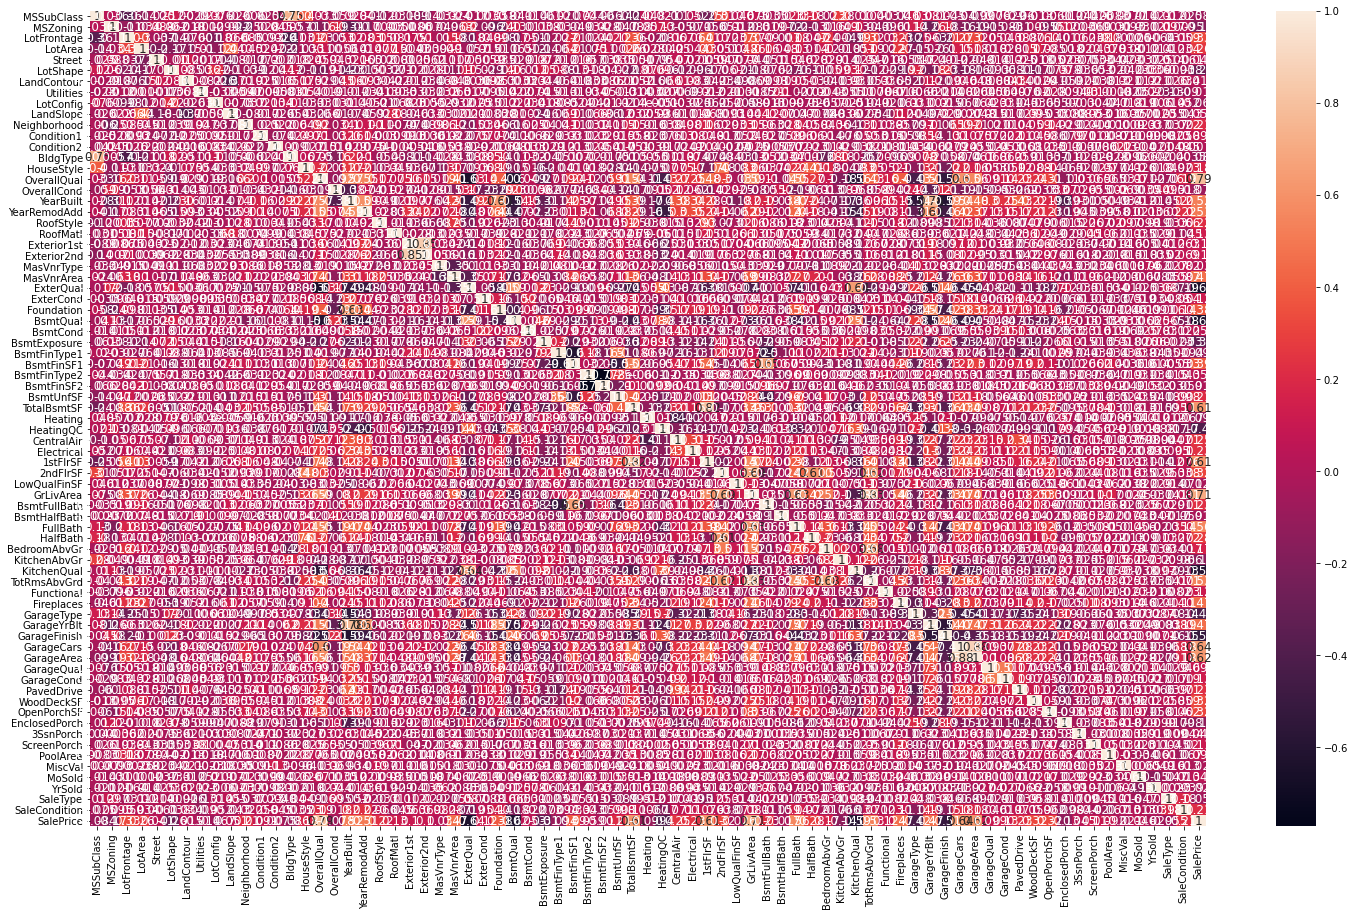

In [15]:
corr = train.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values,annot = True, annot_kws = {'size':12})
heat_map = plt.gcf()
heat_map.set_size_inches(25,15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

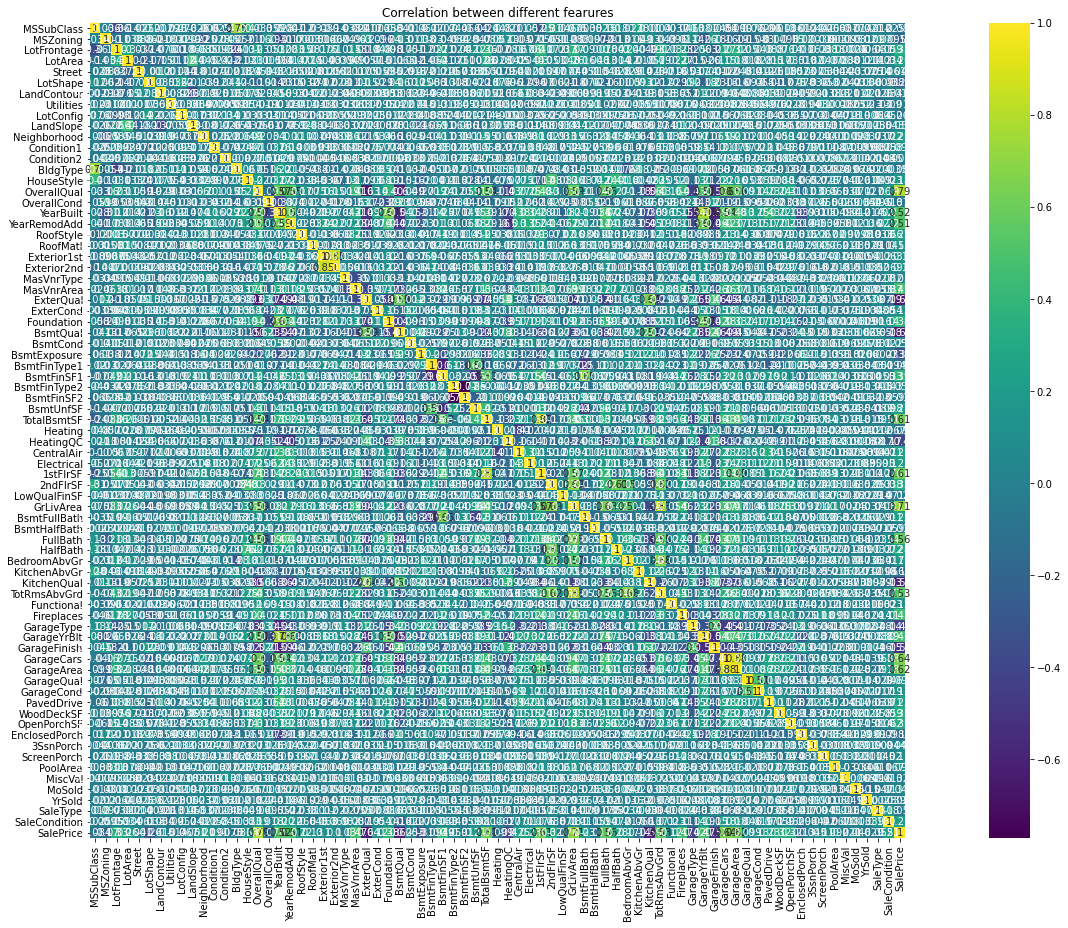

In [16]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();
    
# Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute
#print("After Dropping: ", cleandf)
correlation_heatmap(train, 30,15)

In [17]:
dict(train.var())

{'MSSubClass': 1789.338306402389,
 'MSZoning': 0.3994460457998084,
 'LotFrontage': 485.218557935159,
 'LotArea': 99625649.6503417,
 'Street': 0.004095505459734975,
 'LotShape': 1.9857211263108936,
 'LandContour': 0.5007910278197683,
 'Utilities': 0.0006849315068492968,
 'LotConfig': 2.63294243570848,
 'LandSlope': 0.07630437436037239,
 'Neighborhood': 36.16500840320307,
 'Condition1': 0.7543184954979317,
 'Condition2': 0.06710169284647924,
 'BldgType': 1.435868065009828,
 'HouseStyle': 3.6530857126761105,
 'OverallQual': 1.9126794482991696,
 'OverallCond': 1.2383223637883065,
 'YearBuilt': 912.2154126019891,
 'YearRemodAdd': 426.2328222558135,
 'RoofStyle': 0.6972213093975094,
 'RoofMatl': 0.3589529326711022,
 'Exterior1st': 10.22502558517263,
 'Exterior2nd': 12.535638033180895,
 'MasVnrType': 0.4043579295257506,
 'MasVnrArea': 32663.829315912957,
 'ExterQual': 0.4816284375674838,
 'ExterCond': 0.5355417953749476,
 'Foundation': 0.5218525542922015,
 'BsmtQual': 0.7473776371506164,
 'Bs

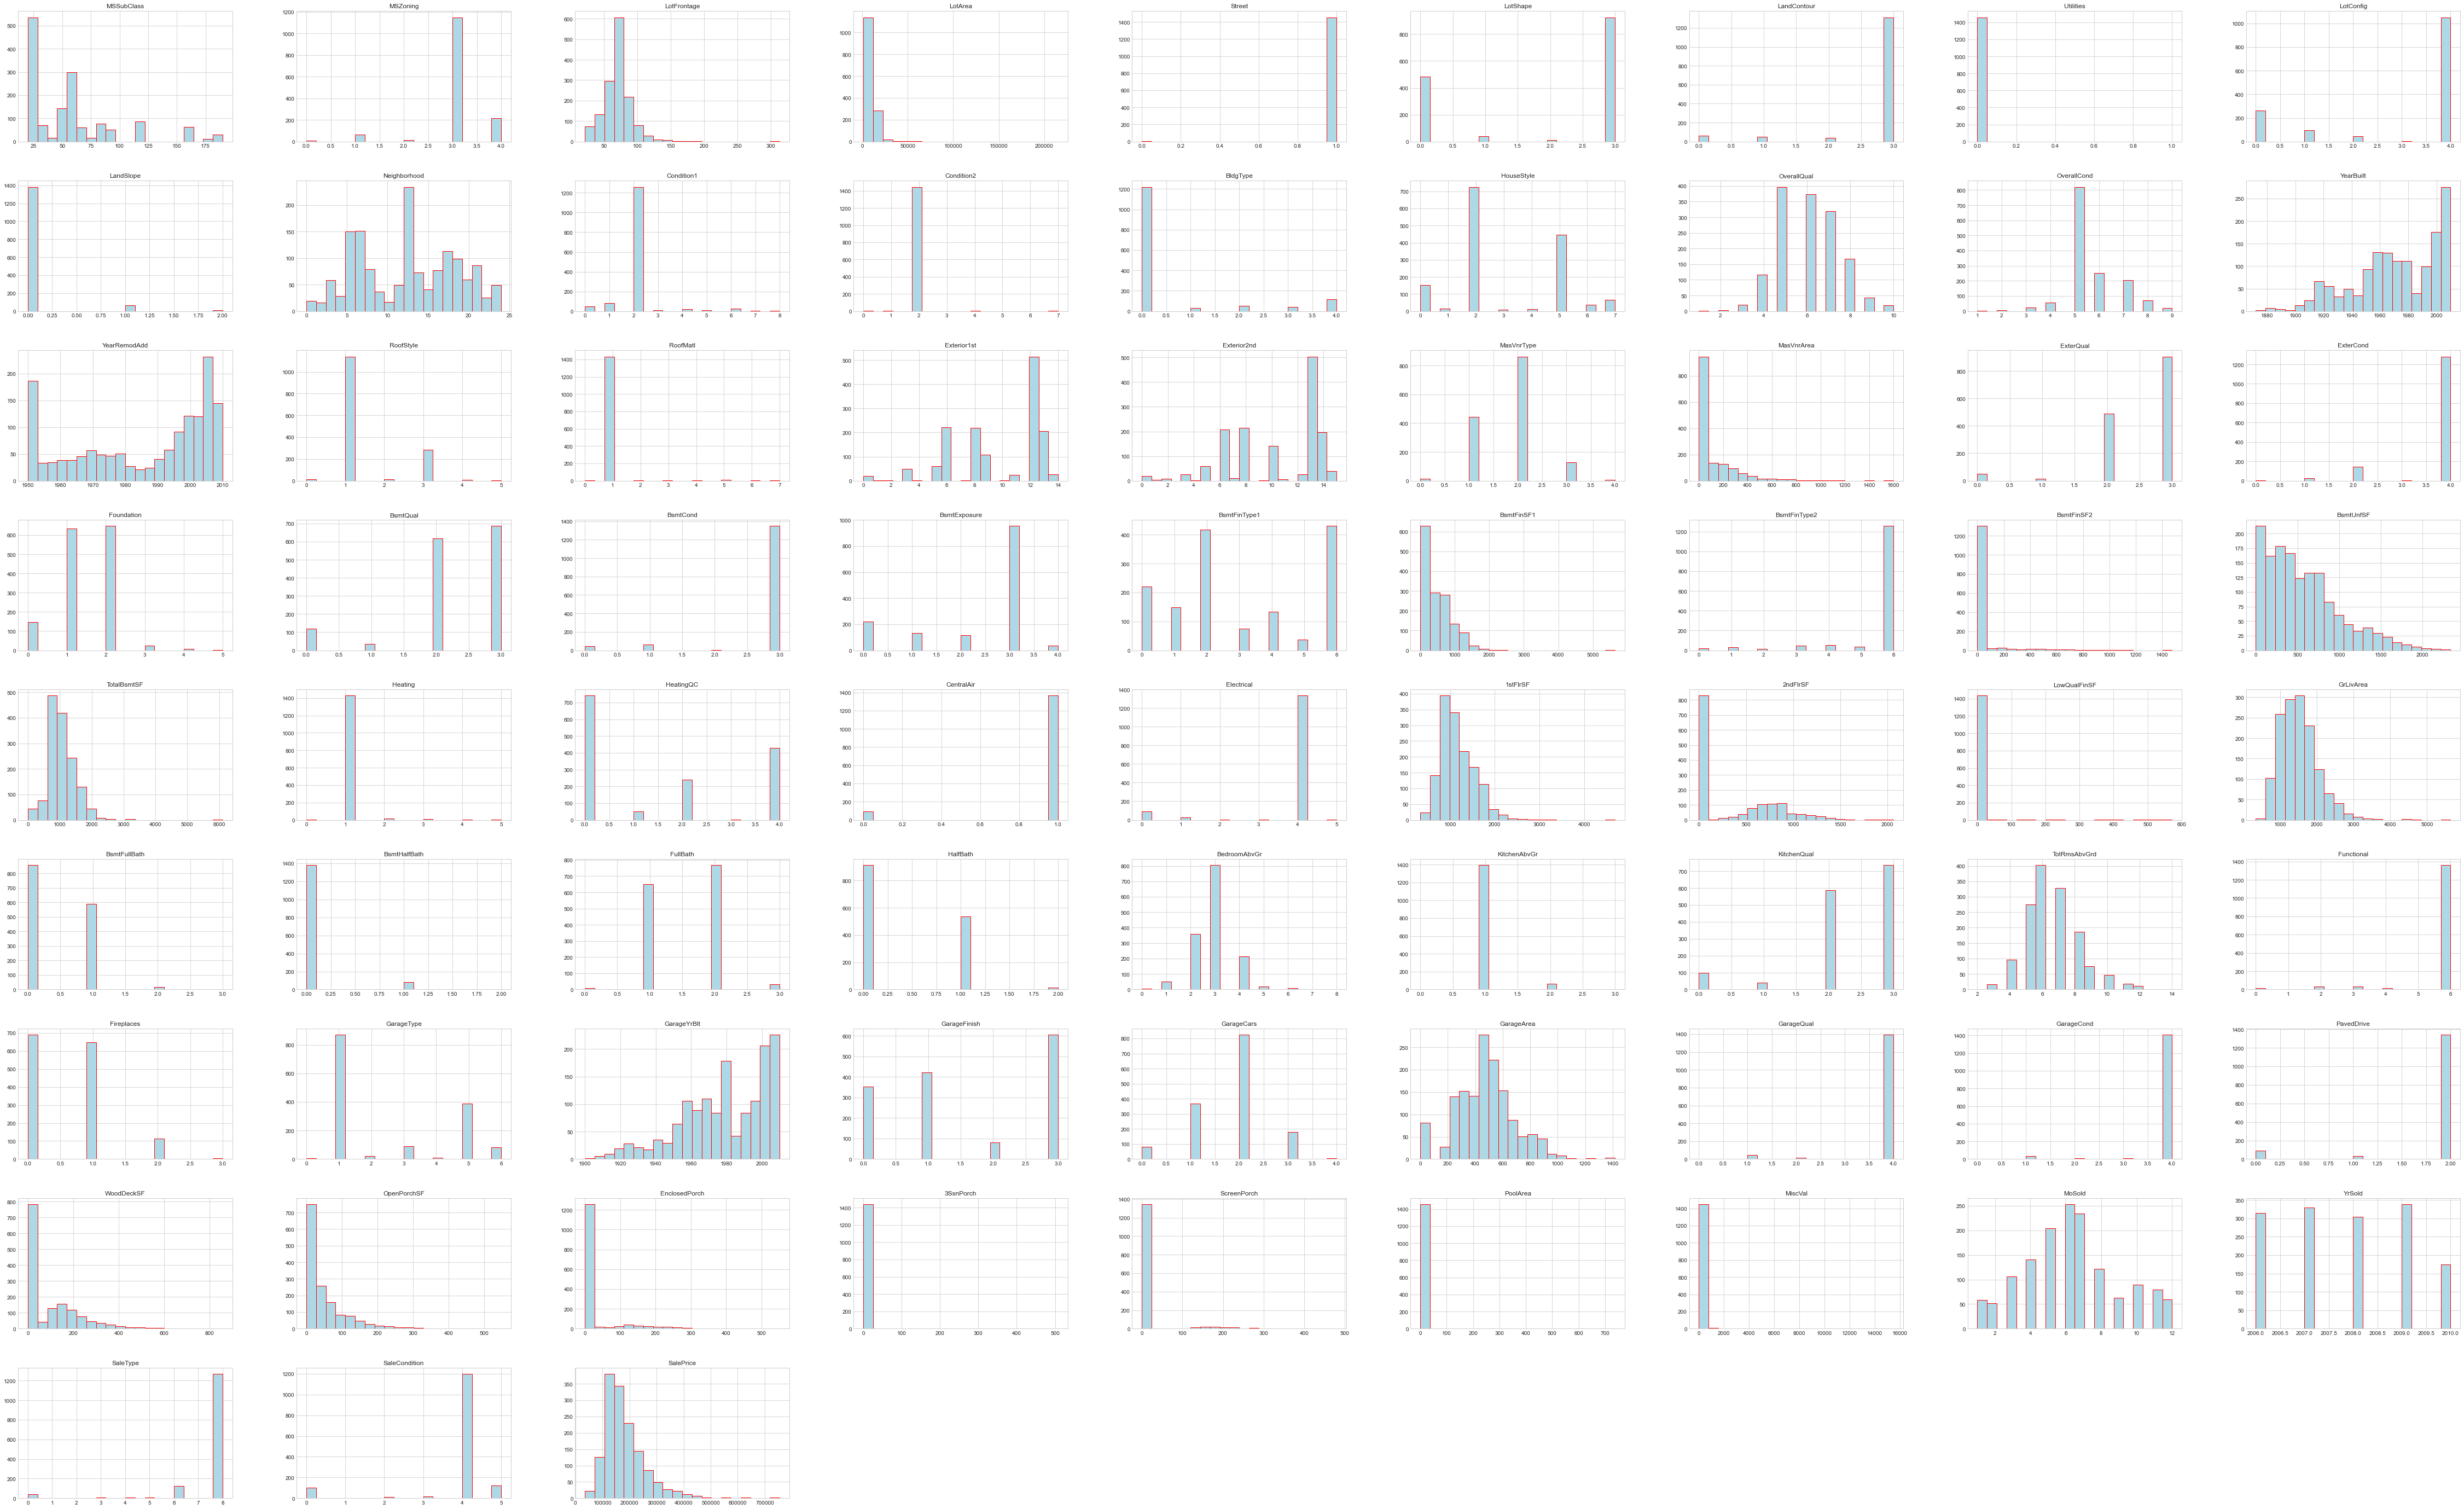

In [18]:
plt.style.use('seaborn-whitegrid')
train.hist(bins=20, figsize=(80,50), color='lightblue', edgecolor = 'red')
plt.show()

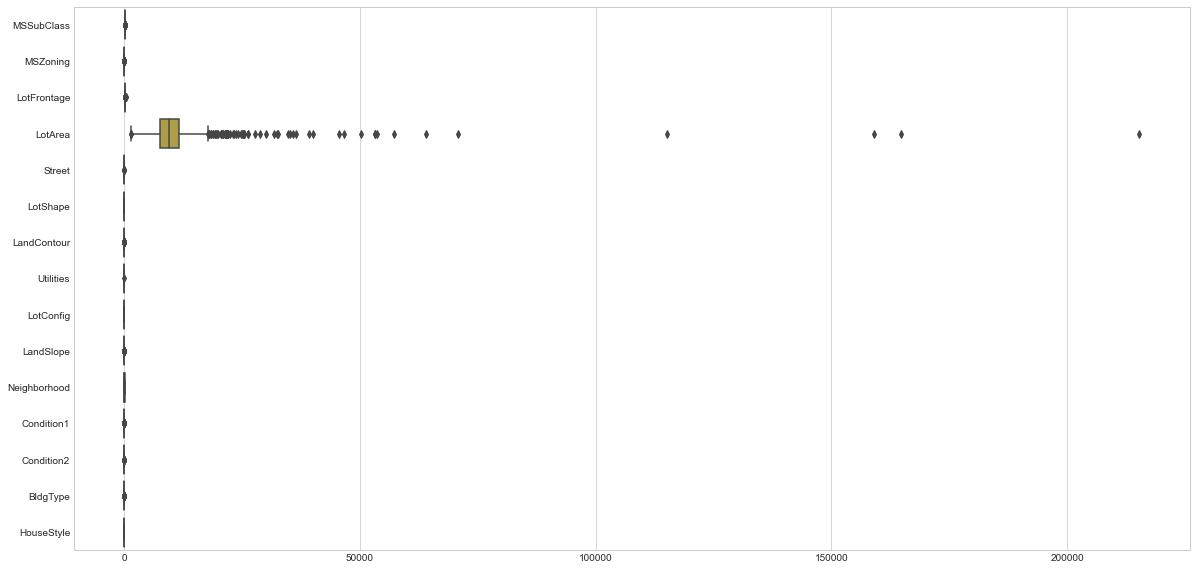

In [19]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=train.iloc[:,:15], orient="h")
plt.show()

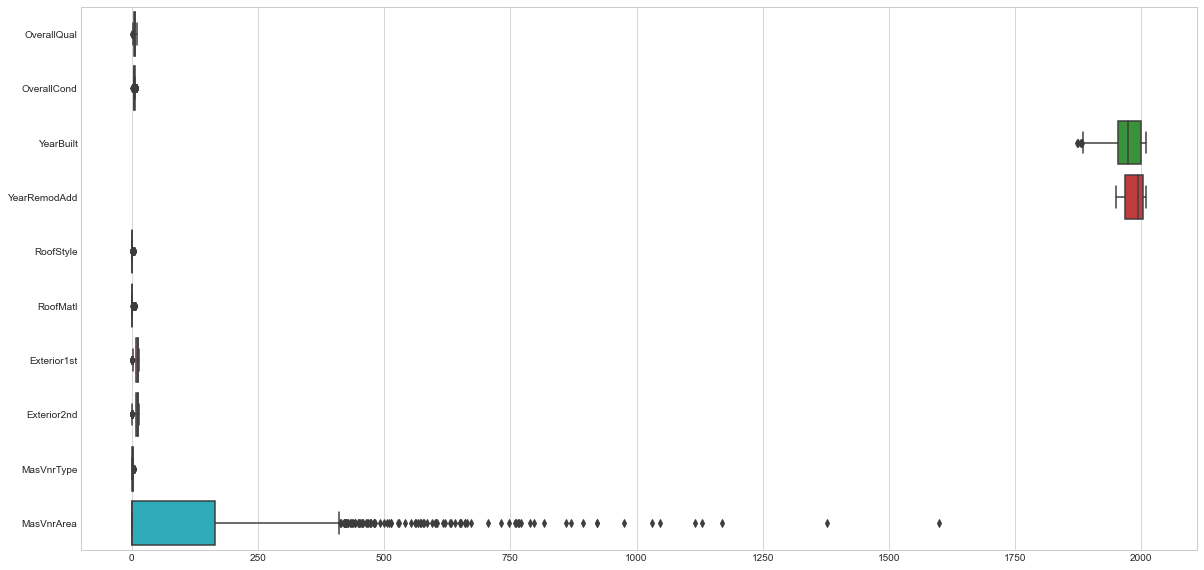

In [20]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=train.iloc[:,15:25], orient="h")
plt.show()

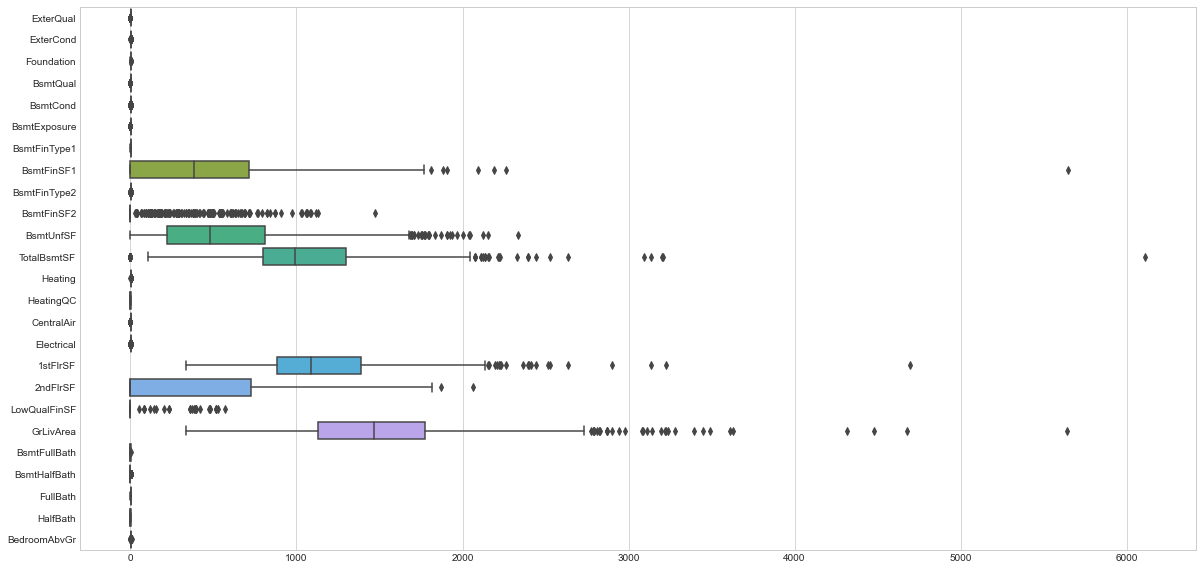

In [21]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=train.iloc[:,25:50], orient="h")
plt.show()

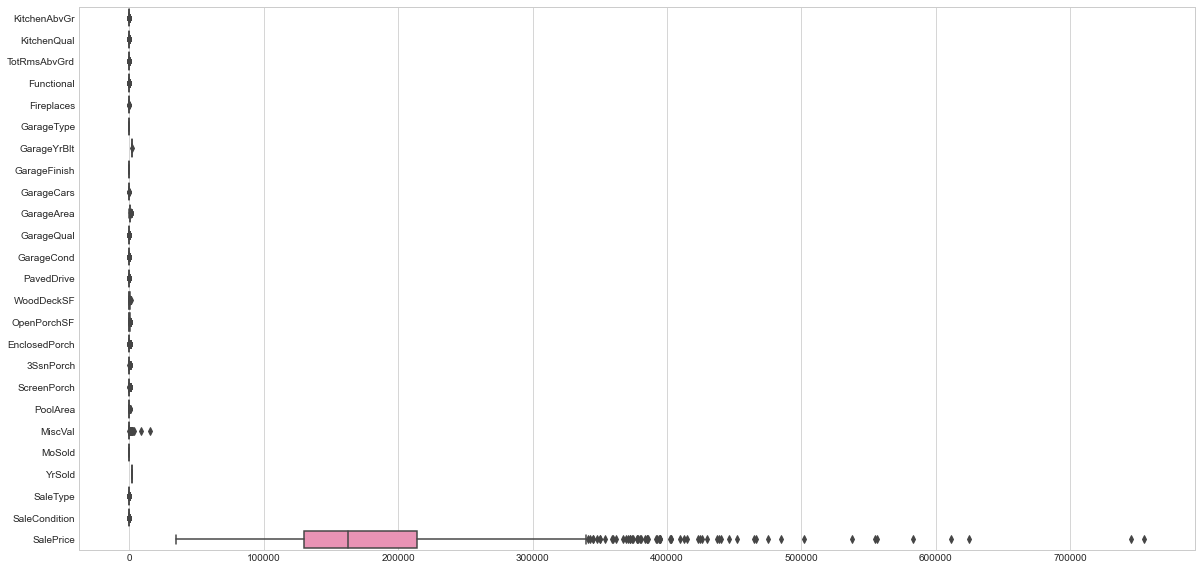

In [22]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=train.iloc[:,50:], orient="h")
plt.show()

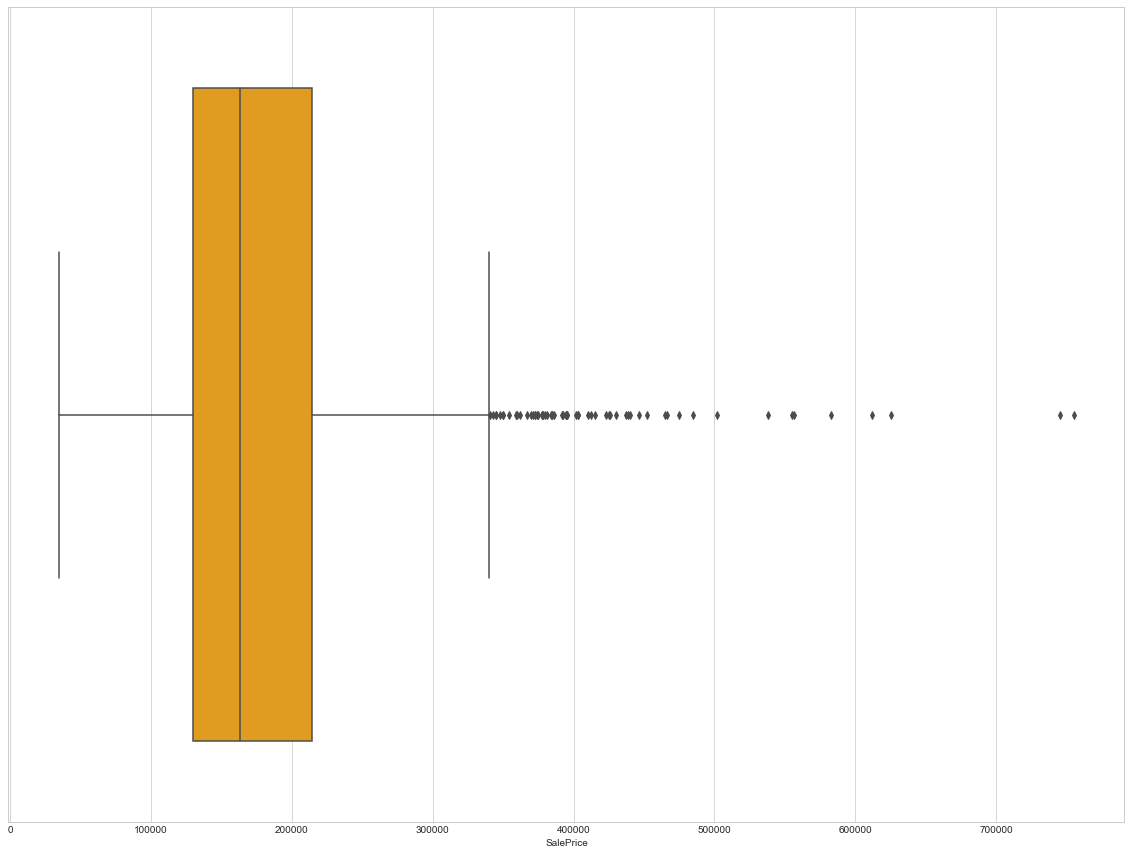

In [23]:
plt.figure(figsize= (20,15))
sns.boxplot(x= train['SalePrice'], color='orange')
plt.show()

# Skewness of the data

In [24]:
dict(train.skew())

{'MSSubClass': 1.4076567471495591,
 'MSZoning': -1.7353953794159185,
 'LotFrontage': 2.4091466665496006,
 'LotArea': 12.207687851233496,
 'Street': -15.518769523446206,
 'LotShape': -0.6101746987339194,
 'LandContour': -3.1624994215215674,
 'Utilities': 38.20994634908561,
 'LotConfig': -1.1356318684354358,
 'LandSlope': 4.813682424489448,
 'Neighborhood': 0.04212153010649173,
 'Condition1': 3.019195845658257,
 'Condition2': 13.171843951308416,
 'BldgType': 2.2456480122431524,
 'HouseStyle': 0.30675459298372293,
 'OverallQual': 0.2169439277628693,
 'OverallCond': 0.6930674724842182,
 'YearBuilt': -0.613461172488183,
 'YearRemodAdd': -0.5035620027004709,
 'RoofStyle': 1.4737963742380578,
 'RoofMatl': 8.109402021334287,
 'Exterior1st': -0.7263135664402056,
 'Exterior2nd': -0.6929626745550399,
 'MasVnrType': 0.12082492024036183,
 'MasVnrArea': 2.6776164510820997,
 'ExterQual': -1.8302652187854904,
 'ExterCond': -2.5653047441855623,
 'Foundation': 0.0912173792095914,
 'BsmtQual': -1.3442884

# Finding outliers using unsupervised learning

In [25]:
model = IsolationForest(contamination=0.04)
model.fit(train)
pred = model.predict(train)
outliers = pred == -1
cleaned_data = train.drop(train[outliers].index)

# Feature Selections

In [26]:
chi2(train.drop('SalePrice', axis = 1), train.SalePrice)

(array([1.92812326e+04, 1.13803139e+02, 5.07863959e+03, 1.01149714e+07,
        3.65060135e+00, 8.02972897e+02, 1.24357379e+02, 2.42333333e+02,
        5.64633630e+02, 8.89793781e+02, 2.19426711e+03, 2.12616289e+02,
        2.73364812e+01, 1.95147825e+03, 8.12887720e+02, 3.78077635e+02,
        1.54978681e+02, 4.43852824e+02, 1.88882164e+02, 3.56053615e+02,
        2.29029740e+02, 6.96025906e+02, 8.08619925e+02, 1.79095623e+02,
        2.88024121e+05, 2.09777237e+02, 8.77695965e+01, 3.02333392e+02,
        3.41659695e+02, 9.94527500e+01, 4.66596456e+02, 1.05306251e+03,
        3.99985064e+05, 1.57053791e+02, 3.68882725e+05, 2.74751155e+05,
        1.74706463e+05, 6.76132408e+01, 1.48314493e+03, 5.38023349e+01,
        2.13594275e+02, 1.23809831e+05, 4.64884066e+05, 2.44880957e+05,
        1.96850058e+05, 4.48324316e+02, 5.97224646e+02, 1.95208250e+02,
        5.20704617e+02, 1.71586739e+02, 2.84908343e+01, 3.03823780e+02,
        3.60000495e+02, 9.75197544e+01, 5.70507272e+02, 1.264929

In [27]:
selector = SelectKBest(chi2, k = 10)
selector.fit(train.drop('SalePrice', axis = 1), train.SalePrice)

SelectKBest(score_func=<function chi2 at 0x000002A7556D7310>)

In [28]:
selector.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False])

In [29]:
s = list()
for elm, z in zip(train.columns, selector.get_support()):
    if(z):
        s.append(elm)
s

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'PoolArea',
 'MiscVal']

In [30]:
selected_features = ['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'PoolArea',
 'MiscVal']

# Splitting data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(cleaned_data[selected_features], cleaned_data.SalePrice, test_size = 0.2, random_state = 42)

# Models Selection

In [32]:
models = [SVR(), LinearRegression(), SGDRegressor()]

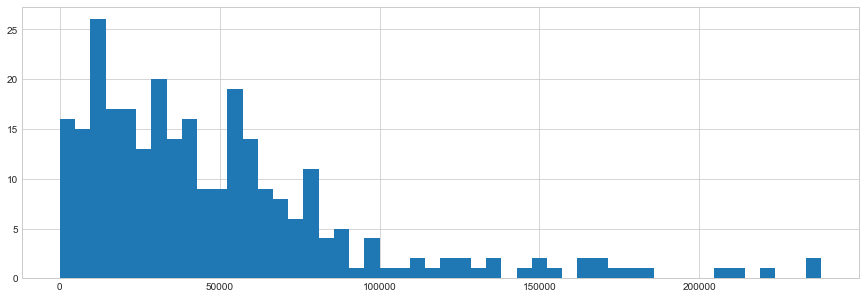

SVR()
MAE:49715.61944001657
RMSE score:66612.33613114026
MAE score:39920.772108384495
________________________________________________________________________________________________________________________


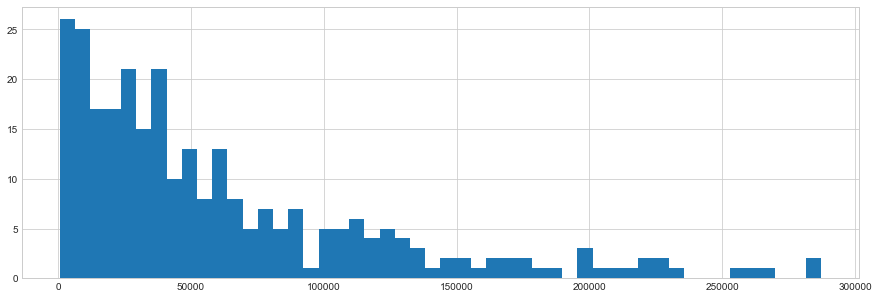

LinearRegression()
MAE:26927.12710504142
RMSE score:36295.872466892804
MAE score:20351.611831133137
________________________________________________________________________________________________________________________


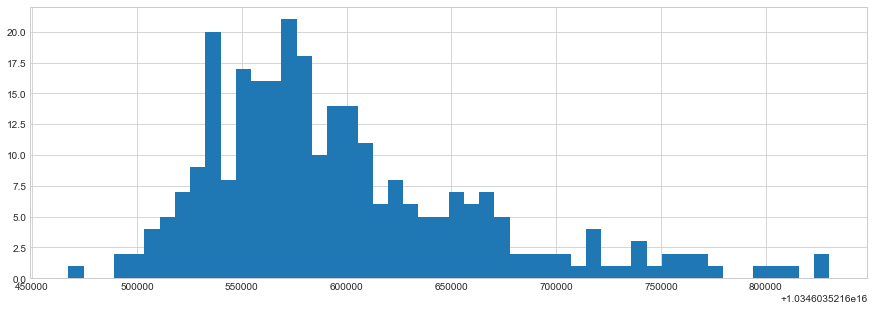

SGDRegressor()
MAE:2.17781939503207e+16
RMSE score:2.8037477880644764e+16
MAE score:1.9763349153329776e+16
________________________________________________________________________________________________________________________


In [33]:
for model in models:
    trainning_score = cross_val_score(model, x_train, y_train, cv = 5).mean()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    plt.figure(figsize = (15,5))
    err_hist = np.abs(y_test - pred.T[0])
    plt.hist(err_hist, bins = 50)
    plt.show()
    
    print("{}".format(str(model)))
    print("MAE:{}".format(mean_absolute_error(y_test, pred)))
    print("RMSE score:{}".format(np.sqrt(mean_squared_error(y_test, pred))))
    print("MAE score:{}".format(median_absolute_error(y_test, pred)))
    print("_"*120)
    pass
pass

# Neural Network for Regression

In [34]:
def build_model(dense_dimension = 200):
    model = Sequential()
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam',loss='mean_squared_error')
    return model

model = build_model()
model.fit(x=x_train, y=y_train, batch_size=200, epochs=500)

Epoch 1/500
6/6 [==============================] - 5s 6ms/step - loss: 37228526445.7143
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 34917781504.0000
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 31617389129.1429
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 24854430573.7143
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 15815589010.2857
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 12945823597.7143
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 14132154075.4286
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 14061944685.7143
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 8156137325.7143
Epoch 10/500
6/6 [==============================] - 0s 4ms/step - loss: 8846839734.8571
Epoch 11/500
6/6 [==============================] - 0s 3ms/step - loss: 8213633389.7143
Epoch 12/500
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 1497732662.8571
Epoch 95/500
6/6 [==============================] - 0s 3ms/step - loss: 1505627318.8571
Epoch 96/500
6/6 [==============================] - 0s 3ms/step - loss: 1555800082.2857
Epoch 97/500
6/6 [==============================] - 0s 3ms/step - loss: 1593963136.0000
Epoch 98/500
6/6 [==============================] - 0s 4ms/step - loss: 1453249206.8571
Epoch 99/500
6/6 [==============================] - 0s 3ms/step - loss: 1454456832.0000
Epoch 100/500
6/6 [==============================] - 0s 4ms/step - loss: 1521472384.0000
Epoch 101/500
6/6 [==============================] - 0s 3ms/step - loss: 1397136429.7143
Epoch 102/500
6/6 [==============================] - 0s 4ms/step - loss: 1492180480.0000
Epoch 103/500
6/6 [==============================] - 0s 4ms/step - loss: 1545271040.0000
Epoch 104/500
6/6 [==============================] - 0s 4ms/step - loss: 1449413357.7143
Epoch 105/500
6/6 [=====================

6/6 [==============================] - 0s 3ms/step - loss: 1476199808.0000
Epoch 187/500
6/6 [==============================] - 0s 3ms/step - loss: 1425175716.5714
Epoch 188/500
6/6 [==============================] - 0s 3ms/step - loss: 1450202861.7143
Epoch 189/500
6/6 [==============================] - 0s 3ms/step - loss: 1496861714.2857
Epoch 190/500
6/6 [==============================] - 0s 3ms/step - loss: 1580056265.1429
Epoch 191/500
6/6 [==============================] - 0s 3ms/step - loss: 1442928566.8571
Epoch 192/500
6/6 [==============================] - 0s 3ms/step - loss: 1530759076.5714
Epoch 193/500
6/6 [==============================] - 0s 3ms/step - loss: 1474190153.1429
Epoch 194/500
6/6 [==============================] - 0s 3ms/step - loss: 1525749193.1429
Epoch 195/500
6/6 [==============================] - 0s 3ms/step - loss: 1389267712.0000
Epoch 196/500
6/6 [==============================] - 0s 3ms/step - loss: 1459946660.5714
Epoch 197/500
6/6 [================

6/6 [==============================] - 0s 3ms/step - loss: 1508410770.2857
Epoch 279/500
6/6 [==============================] - 0s 3ms/step - loss: 1500900809.1429
Epoch 280/500
6/6 [==============================] - 0s 3ms/step - loss: 1450983186.2857
Epoch 281/500
6/6 [==============================] - 0s 3ms/step - loss: 1391873700.5714
Epoch 282/500
6/6 [==============================] - 0s 3ms/step - loss: 1415091364.5714
Epoch 283/500
6/6 [==============================] - 0s 3ms/step - loss: 1465363638.8571
Epoch 284/500
6/6 [==============================] - 0s 3ms/step - loss: 1495706843.4286
Epoch 285/500
6/6 [==============================] - 0s 3ms/step - loss: 1491829613.7143
Epoch 286/500
6/6 [==============================] - 0s 3ms/step - loss: 1403220973.7143
Epoch 287/500
6/6 [==============================] - 0s 3ms/step - loss: 1569727286.8571
Epoch 288/500
6/6 [==============================] - 0s 3ms/step - loss: 1536090989.7143
Epoch 289/500
6/6 [================

6/6 [==============================] - 0s 3ms/step - loss: 1482963949.7143
Epoch 371/500
6/6 [==============================] - 0s 3ms/step - loss: 1405610057.1429
Epoch 372/500
6/6 [==============================] - 0s 3ms/step - loss: 1397732388.5714
Epoch 373/500
6/6 [==============================] - 0s 3ms/step - loss: 1521676032.0000
Epoch 374/500
6/6 [==============================] - 0s 3ms/step - loss: 1389569334.8571
Epoch 375/500
6/6 [==============================] - 0s 3ms/step - loss: 1464879963.4286
Epoch 376/500
6/6 [==============================] - 0s 3ms/step - loss: 1425401344.0000
Epoch 377/500
6/6 [==============================] - 0s 3ms/step - loss: 1466507776.0000
Epoch 378/500
6/6 [==============================] - 0s 3ms/step - loss: 1506659894.8571
Epoch 379/500
6/6 [==============================] - 0s 3ms/step - loss: 1451856384.0000
Epoch 380/500
6/6 [==============================] - 0s 3ms/step - loss: 1439933915.4286
Epoch 381/500
6/6 [================

6/6 [==============================] - 0s 3ms/step - loss: 1326402093.7143
Epoch 463/500
6/6 [==============================] - 0s 3ms/step - loss: 1505180909.7143
Epoch 464/500
6/6 [==============================] - 0s 3ms/step - loss: 1370742381.7143
Epoch 465/500
6/6 [==============================] - 0s 3ms/step - loss: 1459240758.8571
Epoch 466/500
6/6 [==============================] - 0s 3ms/step - loss: 1495528758.8571
Epoch 467/500
6/6 [==============================] - 0s 3ms/step - loss: 1491553755.4286
Epoch 468/500
6/6 [==============================] - 0s 3ms/step - loss: 1367935433.1429
Epoch 469/500
6/6 [==============================] - 0s 3ms/step - loss: 1517422409.1429
Epoch 470/500
6/6 [==============================] - 0s 3ms/step - loss: 1432172379.4286
Epoch 471/500
6/6 [==============================] - 0s 3ms/step - loss: 1432203008.0000
Epoch 472/500
6/6 [==============================] - 0s 3ms/step - loss: 1427475931.4286
Epoch 473/500
6/6 [================

In [35]:
y_pred = model.predict(x_test)

In [36]:
print('MAE:', mean_absolute_error(y_test, y_pred))  
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE score:{}".format(median_absolute_error(y_test, y_pred)))

MAE: 26947.674919372777
RMSE: 36684.71077938235
MAE score:20275.140625


# Histogramme error

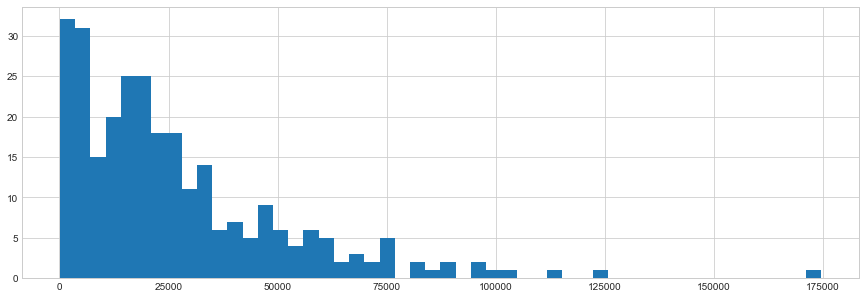

In [37]:
plt.figure(figsize = (15,5))
err_hist = np.abs(y_test - y_pred.T[0])
plt.hist(err_hist, bins = 50)
plt.show()

# Partie 2 Reduction of Dimension Using PCA

In [50]:
pca = PCA(n_components=10)

In [52]:
X_reduced = pca.fit_transform(train.drop('SalePrice', axis = 1))
y         = train.SalePrice

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 42)

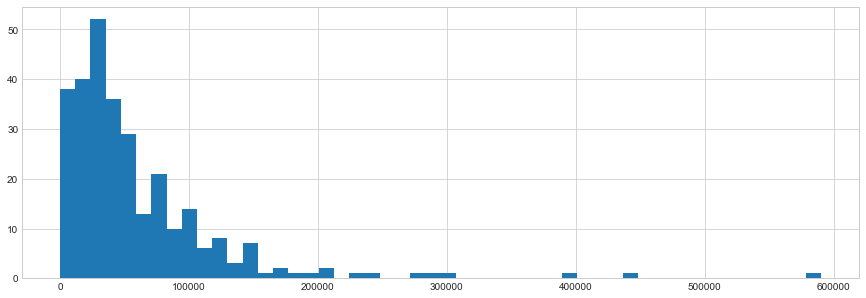

SVR()
MAE:59549.37296443152
RMSE score:88644.41081302825
MAE score:40027.69051072041
________________________________________________________________________________________________________________________


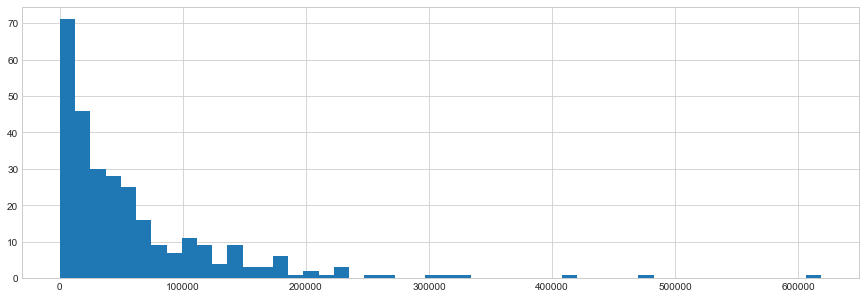

LinearRegression()
MAE:27026.927313148444
RMSE score:43109.41614554602
MAE score:16982.853887112506
________________________________________________________________________________________________________________________


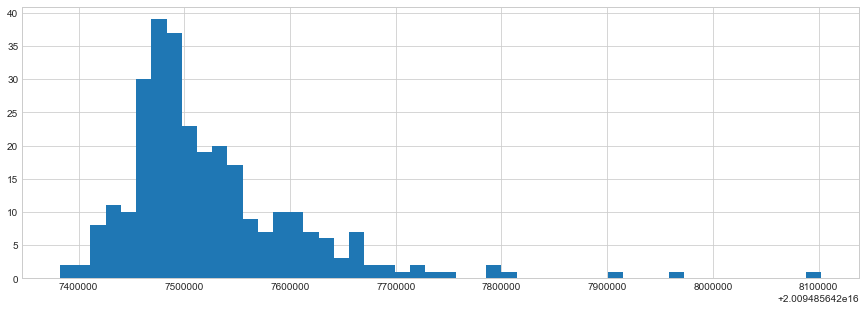

SGDRegressor()
MAE:3.887240912539422e+16
RMSE score:6.598365718201161e+16
MAE score:2.5476498710155284e+16
________________________________________________________________________________________________________________________


In [56]:
for model in models:
    trainning_score = cross_val_score(model, x_train, y_train, cv = 5).mean()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    plt.figure(figsize = (15,5))
    err_hist = np.abs(y_test - pred.T[0])
    plt.hist(err_hist, bins = 50)
    plt.show()
    
    print("{}".format(str(model)))
    print("MAE:{}".format(mean_absolute_error(y_test, pred)))
    print("RMSE score:{}".format(np.sqrt(mean_squared_error(y_test, pred))))
    print("MAE score:{}".format(median_absolute_error(y_test, pred)))
    print("_"*120)
    pass
pass